## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [49]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

/bin/sh: 1: nvidia-smi: not found


In [50]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [51]:
train, test = keras.datasets.cifar10.load_data()

In [52]:
## 資料前處理
"""
Your code here
"""
def preproc_x(data, flatten=True):

    result = (data / 255.0) - 0.5
    if flatten:
        result = result.reshape(len(data), -1)

    return result

def preproc_y(target, num_classes=10):
    ta = keras.utils.to_categorical(target, num_classes=num_classes)
    return ta


In [53]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [54]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, activation="relu", units=[1024, 512, 256, 128, 64]):

    model = keras.models.Sequential()

    for idx, unit in enumerate(units):
        if idx == 0:
            model.add(keras.layers.Dense(units=unit, activation=activation, input_shape=input_shape))
        else:
            model.add(keras.layers.Dense(units=unit, activation=activation))
        
    model.add(keras.layers.Dense(units=10, activation="softmax"))   
    
    return model
        
model = build_mlp(x_train.shape[1:])    
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dense_14 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_15 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_16 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_18 (Dense)             (None, 10)                650       
Total params: 3,844,682
Trainable params: 3,844,682
Non-trainable params: 0
____________________________________________

In [55]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [56]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", 
              metrics=["accuracy"],
              optimizer=optimizer)

In [57]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 139us/step - loss: 1.6849 - accuracy: 0.4005 - val_loss: 1.5321 - val_accuracy: 0.4582
Epoch 2/100
50000/50000 [==============================] - 7s 136us/step - loss: 1.4450 - accuracy: 0.4892 - val_loss: 1.4210 - val_accuracy: 0.4983
Epoch 3/100
50000/50000 [==============================] - 7s 140us/step - loss: 1.3277 - accuracy: 0.5289 - val_loss: 1.3976 - val_accuracy: 0.5038
Epoch 4/100
50000/50000 [==============================] - 7s 135us/step - loss: 1.2167 - accuracy: 0.5715 - val_loss: 1.3672 - val_accuracy: 0.5213
Epoch 5/100
50000/50000 [==============================] - 7s 139us/step - loss: 1.1159 - accuracy: 0.6051 - val_loss: 1.3749 - val_accuracy: 0.5306
Epoch 6/100
50000/50000 [==============================] - 7s 137us/step - loss: 1.0319 - accuracy: 0.6325 - val_loss: 1.3275 - val_accuracy: 0.5387
Epoch 7/100
50000/50000 [==============================]

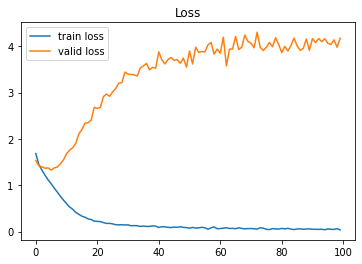

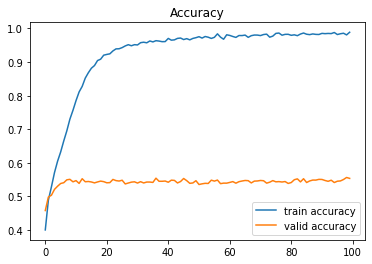

In [58]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()